Miłosz Błachowiak

In [62]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [63]:
F = len("Milosz")
L = len("Blachowiak")

print("F = ", F)
print("L = ", L)

F =  6
L =  10


## Excercise 1 -  Generated Quantities Block

In [64]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [65]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [66]:
# 2. Create a pandas dataframe from resulting draws

dataframe = samples.draws_pd()
dataframe

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,2.11748,7.0,2.0,5.0,4.0,4.0,2.0
1,0.0,0.0,46.84100,45.0,48.0,55.0,48.0,37.0,59.0
2,0.0,0.0,76.06970,85.0,77.0,91.0,68.0,85.0,75.0
3,0.0,0.0,153.97700,158.0,153.0,155.0,150.0,168.0,145.0
4,0.0,0.0,187.67200,163.0,196.0,177.0,202.0,193.0,164.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,15.96360,12.0,11.0,9.0,17.0,21.0,19.0
996,0.0,0.0,43.82410,34.0,41.0,36.0,42.0,50.0,44.0
997,0.0,0.0,5.86278,4.0,4.0,4.0,8.0,10.0,9.0
998,0.0,0.0,88.04170,70.0,85.0,114.0,97.0,87.0,80.0


Text(0.5, 0.98, 'Histograms for each y_sim')

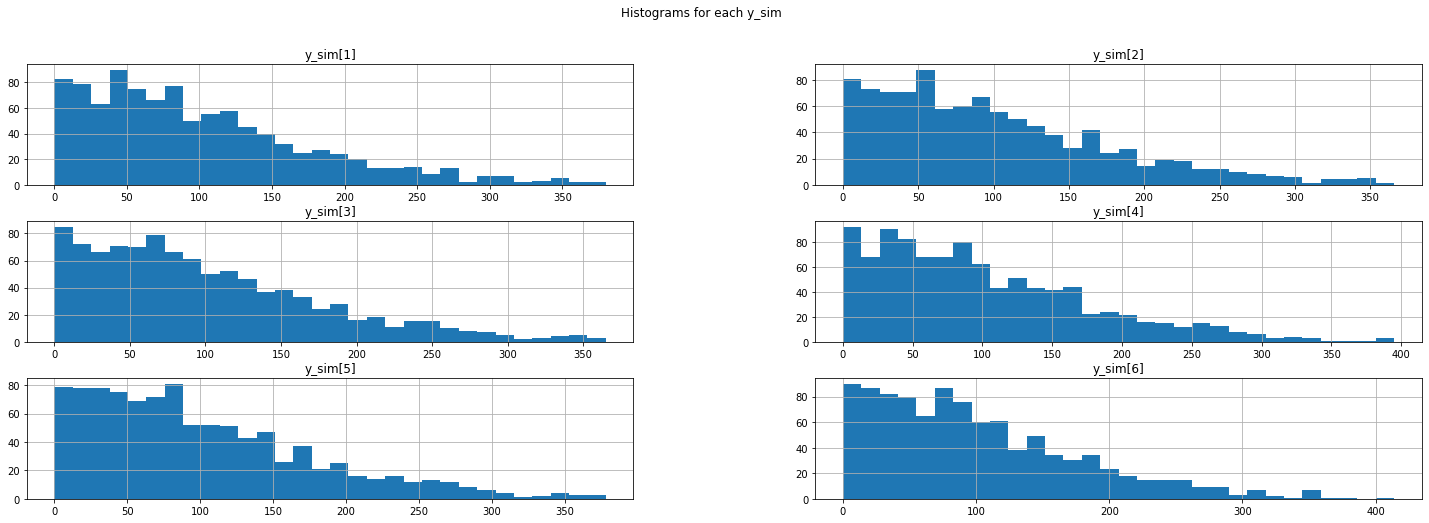

In [67]:
# 3. Plot a histogeram for each of y_sim and lambdas

y_sims = dataframe[dataframe.columns[3:]]

y_sims.hist(bins=30, figsize=(25, 8))
plt.suptitle("Histograms for each y_sim")

Text(0.5, 1.0, 'Histogram for lambda')

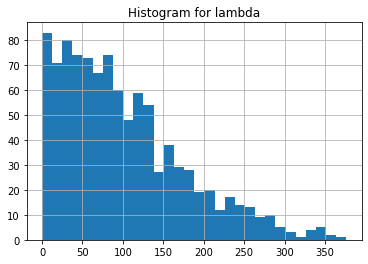

In [68]:
lambda_ = dataframe['lambda']
lambda_.hist(bins=30)
plt.title("Histogram for lambda")

## Excercise 2 - Constraints on the data 

In [69]:
bern1 = CmdStanModel(stan_file='code_2.stan')

# There is an error for y set to [0, 2]
# samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [70]:
bern2 = CmdStanModel(stan_file='code_3.stan')

# There is an error for y set to [0, 2]
# samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 0.98, 'Histograms for constrained theta')

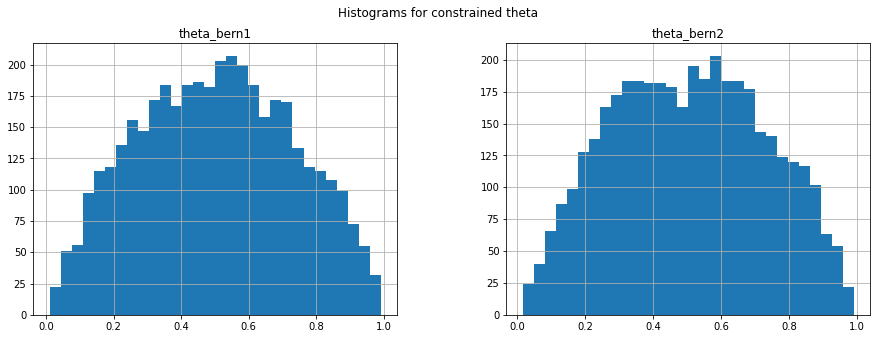

In [71]:
# Observe how constraints on data behave for code_2 and code_3

# Observing constrained theta from both samples
theta_bern1 = samp_bern1.stan_variable("theta")
theta_bern2 = samp_bern2.stan_variable("theta")

dataframe = pd.DataFrame({'theta_bern1': theta_bern1, 'theta_bern2': theta_bern2})

dataframe.hist(bins=30, figsize=(15, 5))
plt.suptitle("Histograms for constrained theta")

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [72]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▋   | 00:00 Iteration: 4500 / 7000 [ 64%]  (Sampling)







chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_4-20230322174004_1.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_4-20230322174004_2.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_4-20230322174004_3.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_4-20230322174004_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

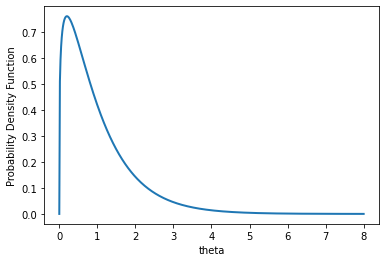

Text(0.5, 1.0, 'Histogram of theta samples (bins = 160)')

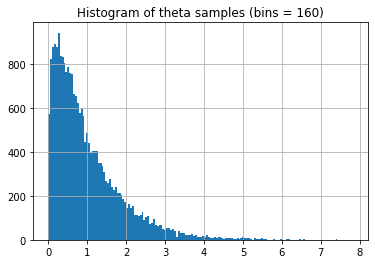

In [73]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples with 160 bins
theta = out_gamma1.stan_variable('theta')

dataframe = pd.DataFrame({'theta': theta})
dataframe.hist(bins=160)
plt.title("Histogram of theta samples (bins = 160)")

**Diagnostic message from code_4:**

<i>Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.</i>

Histograms looks very similar to probability distribution, negative theta values (samples) are cut off.

### Constrained parameter

In [74]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration: 3300 / 7000 [ 47%]  (Sampling)








chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_5-20230322174006_1.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_5-20230322174006_2.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_5-20230322174006_3.csv, /home/DA_Volume/Data_Analytics_LAB/Lab2/samples/code_5-20230322174006_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

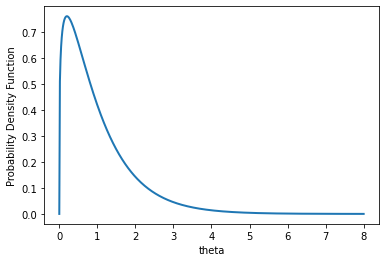

Text(0.5, 1.0, 'Histogram of theta samples (bins = 160)')

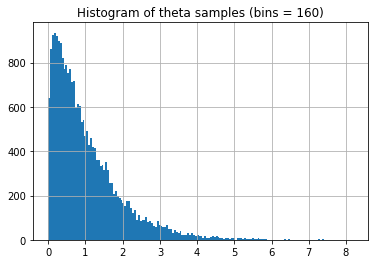

In [75]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## add histogram of theta samples from the second model with 160 bins
theta = out_gamma2.stan_variable('theta')

dataframe = pd.DataFrame({'theta': theta})
dataframe.hist(bins=160)
plt.title("Histogram of theta samples (bins = 160)")

There is no diagnostic message like there was for code_4, the histogram has not changed visibly

## Excercise 4 -  Selection of parameters using equation solving



In [76]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = len("Milosz") # number of letters in the first name
L = len("Blachowiak") # number of letters in the last name

y0 = 0.8# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

print("Standard deviation found using code_6:")
tunes.draws_pd(['sigma'])

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Standard deviation found using code_6:


,sigma
0,3.1058


## Excercise 5 - different methods of defining models


In [77]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 6102000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


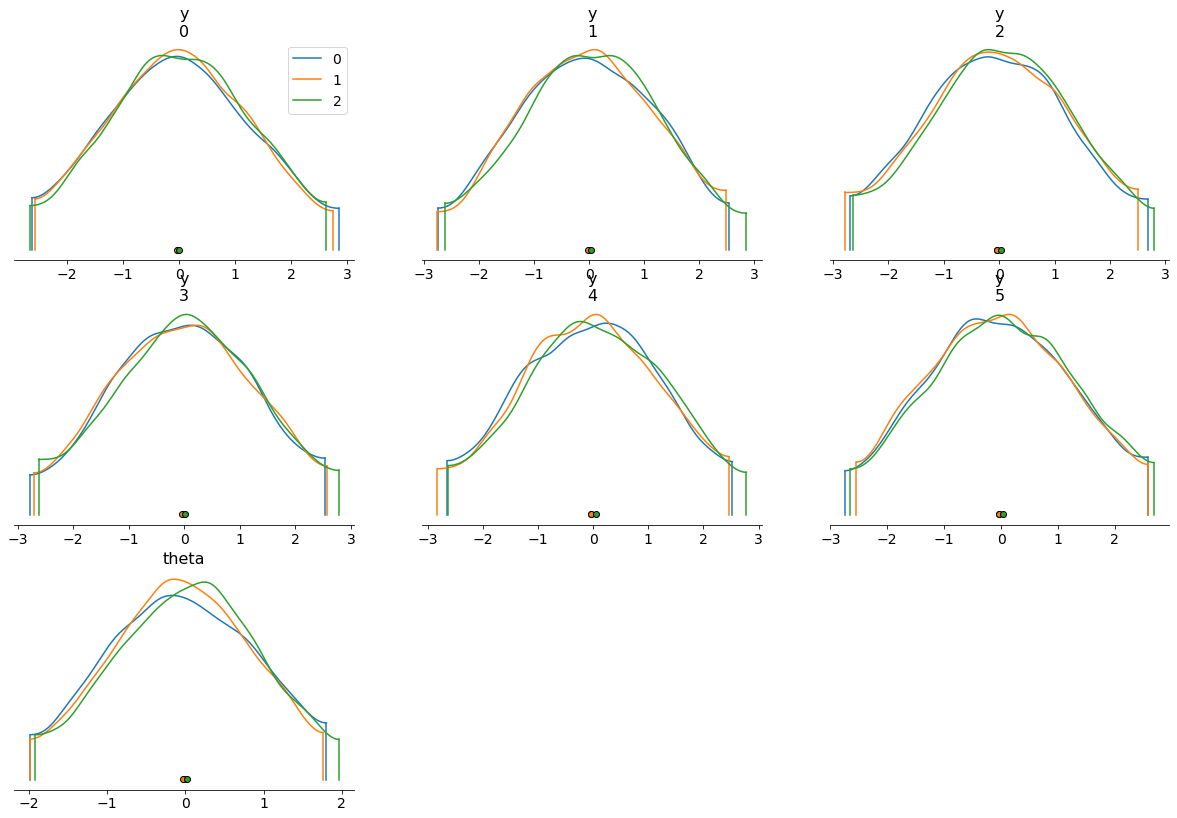

In [78]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [79]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variable
dataframe = mean_of_y.draws_pd()
dataframe

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing


,mean_y
0,-1.808440
1,-1.854670
2,-1.823850
3,-1.278470
4,1.389920
...,...
3995,-0.233397
3996,-0.711565
3997,0.816397
3998,0.409715


array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

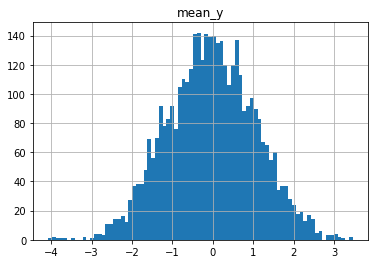

In [80]:
dataframe.hist(bins=80)